In [286]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt

## B. Polinômio de Taylor

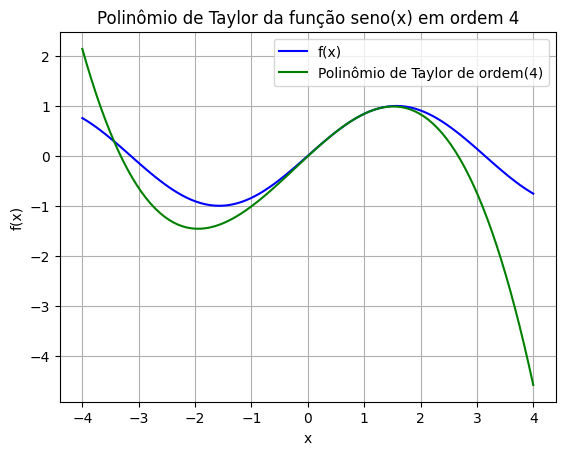

In [288]:
#1. sin x, x0 = pi/4
x = sp.Symbol('x')
f = sp.sin(x)

x0 = sp.pi/4
n = 4

taylor = f.series(x, x0, n).removeO()

taylor_vals = [taylor.subs(x, val) for val in np.linspace(-4, 4, 100)]
f_vals = [f.subs(x, val) for val in np.linspace(-4, 4, 100)]

plt.plot(np.linspace(-4, 4, 100), f_vals, label='f(x)', color='blue')
plt.plot(np.linspace(-4, 4, 100), taylor_vals, label=f'Polinômio de Taylor de ordem({n})', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Polinômio de Taylor da função seno(x) em ordem {n}')
plt.grid()
plt.show()


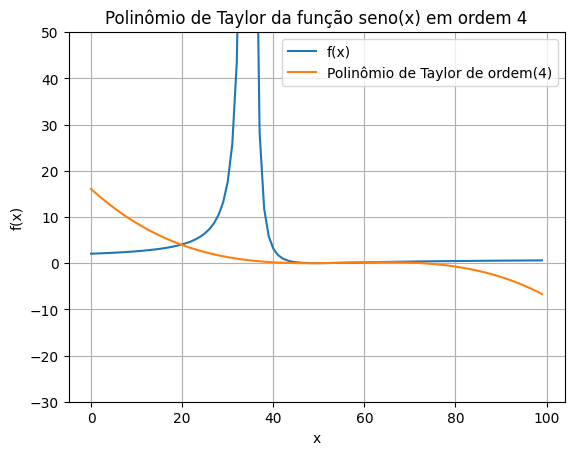

"plt.plot(np.linspace(-4, 4, 100), f_vals, label='f(x)', color='blue')\nplt.plot(np.linspace(-4, 4, 100), taylor_vals, label=f'Polinômio de Taylor de ordem({n})', color='green')\nplt.legend()\nplt.xlabel('x')\nplt.ylabel('f(x)')\nplt.title(f'Polinômio de Taylor da função seno(x) em ordem {n}')\nplt.grid()\nplt.show()"

In [294]:
#B x^2/(x+3)^2
x = sp.Symbol('x')
f = x**2/(x+3)**2

x0 = 1
n = 4
taylor = f.series(x, x0, n).removeO()
taylor_vals = [taylor.subs(x, val) for val in np.linspace(-10, 10, 100)]

f_vals = [f.subs(x, val) for val in np.linspace(-10, 10, 100)]


fig, ax = plt.subplots()
ax.plot(f_vals,label='f(x)')
ax.plot(taylor_vals,label=f"Polinômio de Taylor de ordem({n})")
ax.set_ylim(-30, 50)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Polinômio de Taylor da função seno(x) em ordem {n}')
plt.legend()
plt.grid()
plt.show()



## C. Reta Tangente e Reta Normal

A equação da reta tangente é: 3*x/4 - 9/4 + log(8)
A equação da reta normal é -4*x/3 + log(8) + 4
A solução da equação da reta tangente é: [3 - log(16)]
A solução da equação da reta normal é: [9*log(2)/4 + 3]


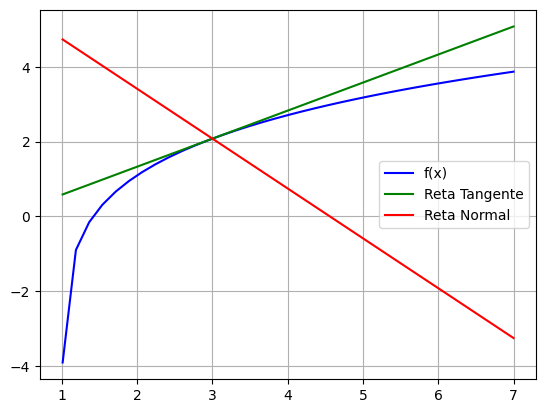

In [290]:
x= sp.symbols('x')
def f(x):
    return sp.log(x**2-1)

sp.diff(f(x),x)

x0=3
m=sp.diff(f(x),x).subs(x,x0)
def rtg(x):
    return f(x0)+m*(x-x0)

def rn(x):
    return f(x0)-1/m*(x-x0)
print(f"A equação da reta tangente é: {rtg(x)}")
print(f"A equação da reta normal é {rn(x)}")


intervalo = np.linspace(1.01,7,35)
f_vals =   [f(x).subs(x,i) for i in intervalo]
rtg_vals = [rtg(x).subs(x,i) for i in intervalo]
rn_vals =  [rn(x).subs(x,i) for i in intervalo]


plt.plot(intervalo, f_vals, label="f(x)",color="blue")
plt.plot(intervalo, rtg_vals, label="Reta Tangente", color="green")
plt.plot(intervalo, rn_vals, label="Reta Normal", color="red")

plt.legend()
plt.grid()
t = sp.solve(rtg(x))
n = sp.solve(rn(x))
print(f"A solução da equação da reta tangente é: {t}")
print(f"A solução da equação da reta normal é: {n}")

## 4. Método de Newton

In [322]:
def f(x):
    return (x * np.exp(x) - np.sin(x))

epsilon = 10**-12
nmax=10**4 
n=1
dif=1.0
x0= -3
while (n<=nmax)and(dif>epsilon):
    x1=f(x0)
    dif=abs(x1-x0)
    n=n+1
    x0=x1
    print(x1)


-0.008241197043724613
6.754494951712736e-05
4.56252564986256e-09
2.0816640352691057e-17
0.0


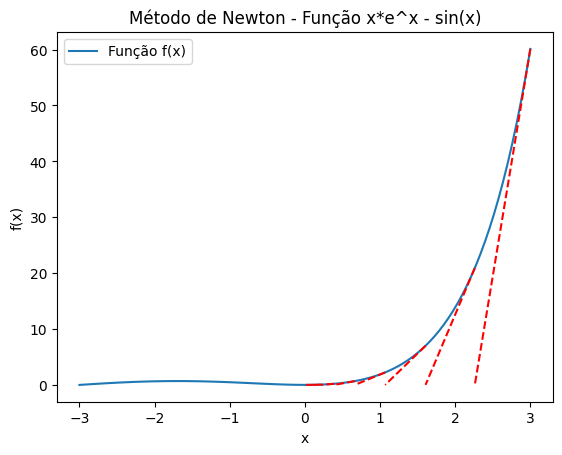

In [321]:
def f(x):
    return x * np.exp(x) - np.sin(x)

def dx(x):
    return np.exp(x) * (x + 1) - np.cos(x)


x_range = np.linspace(-3, 3, 100)
plt.plot(x_range, f(x_range), label='Função f(x)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método de Newton - Função x*e^x - sin(x)')
plt.legend()

x0 = 3
max_iter = 10  
x = x0

for i in range(max_iter):
    plt.plot([x, x - f(x) / dx(x)], [f(x), 0], 'r--')
    x = x - f(x) / dx(x)  
plt.show()
